### Let's see what this looks like 

In [1]:
import pandas as pd
import numpy as np
import pickle
import os
import datetime
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

#### I'll be testing functions on this abbreviated chunk of one file

In [57]:
test_df = pd.read_csv('data/2017-fordgobike-tripdata.csv').head(3000)

In [32]:
test_df.info() ##ELABORATE LATER, THURSDAY AFT?FRIDAY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
duration_sec               1000 non-null int64
start_time                 1000 non-null object
end_time                   1000 non-null object
start_station_id           1000 non-null int64
start_station_name         1000 non-null object
start_station_latitude     1000 non-null float64
start_station_longitude    1000 non-null float64
end_station_id             1000 non-null int64
end_station_name           1000 non-null object
end_station_latitude       1000 non-null float64
end_station_longitude      1000 non-null float64
bike_id                    1000 non-null int64
user_type                  1000 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 101.7+ KB


In [3]:
folder = 'pickle/' #pickled dataframes - see initial_read.py for that process
files = sorted([folder+file for file in os.listdir(folder) if not file.startswith('.')])

### THERE IS JUST OVER 1GB OF DATA ACROSS 27 CSV'S AND WE WON'T BE ABLE TO CONCAT THIS ALL INTO 1 DATAFRAME
#### I'LL WRITE FUNCTIONS THAT WILL BE CALLED ON INDIVIDUAL DFs
#### >FIRST WE'LL WANT TO CHECK TO SEE IF OUR THE MOST IMPORTANT COLUMNS HAVE NULL VALUES TO BE CLEANED

In [171]:
from src.pickle_load import BikeData
from src.data_funcs import *
from src.plot_funcs import *

In [6]:
bike_data = BikeData(files)

In [131]:
bike_trips_per_month = bike_data.do_on_all(rentals_per_month)

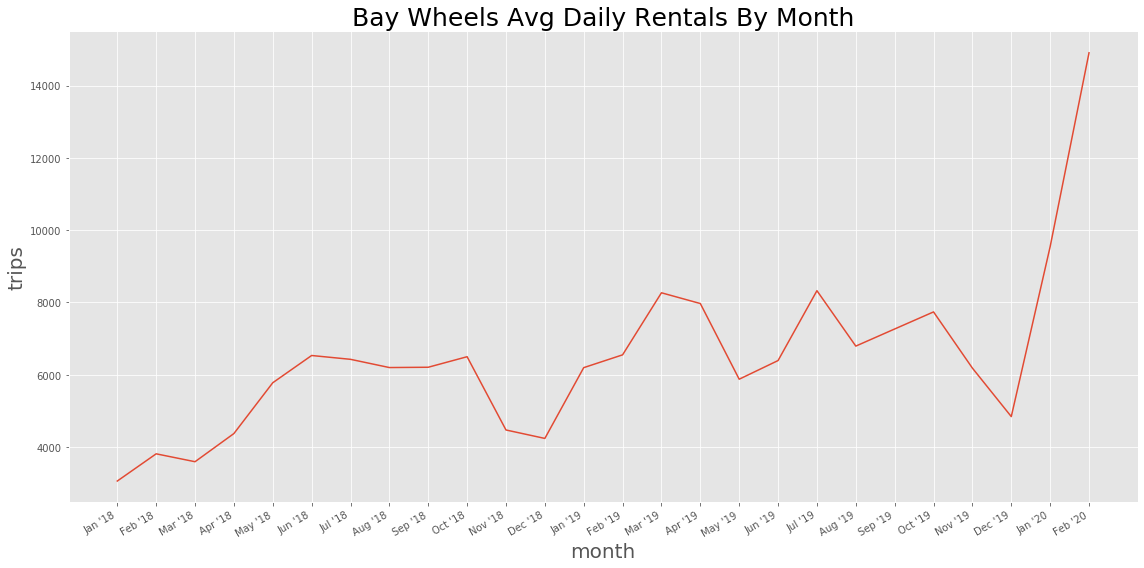

In [113]:
chart([bike_trips_per_month], kind='plot', name='Bay Wheels Avg Daily Rentals By Month', y_name='trips')

#### looks like they're growing and had a HUGE february

In [111]:
fleet_per_month = bike_data.do_on_all(bikes_per_month)

In [112]:
fleet_per_month

OrderedDict([("Jan '18", 3065),
             ("Feb '18", 3123),
             ("Mar '18", 3169),
             ("Apr '18", 3352),
             ("May '18", 3309),
             ("Jun '18", 3344),
             ("Jul '18", 3201),
             ("Aug '18", 3140),
             ("Sep '18", 3045),
             ("Oct '18", 2913),
             ("Nov '18", 2762),
             ("Dec '18", 3765),
             ("Jan '19", 3783),
             ("Feb '19", 4646),
             ("Mar '19", 4423),
             ("Apr '19", 4520),
             ("May '19", 2853),
             ("Jun '19", 3049),
             ("Jul '19", 4436),
             ("Aug '19", 4020),
             ("Sep '19", 5350),
             ("Oct '19", 5447),
             ("Nov '19", 5381),
             ("Dec '19", 5905),
             ("Jan '20", 8016),
             ("Feb '20", 8249)])

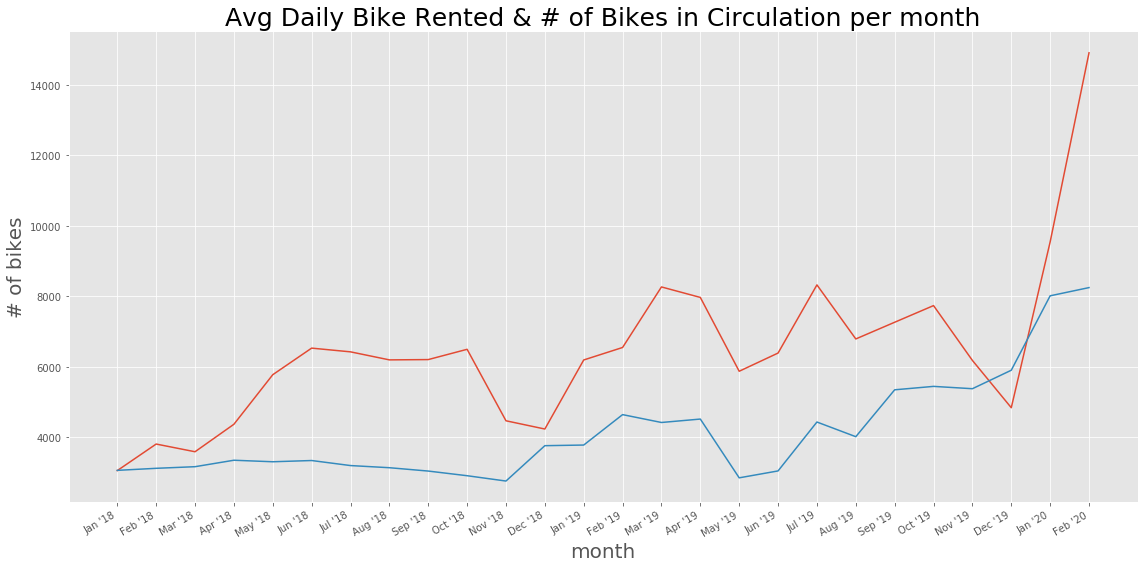

In [114]:
chart([bike_trips_per_month, fleet_per_month], kind='plot', name='Avg Daily Bike Rented & # of Bikes in Circulation per month', y_name='# of bikes', )

In [26]:
from scipy import stats
stats.ttest_ind(list(bike_trips_per_month.values()), list(fleet_per_month.values()))[1]

3.385850031935956e-19

In [166]:
weekend_data = bike_data.do_on_all(weekend_insights)

In [167]:
weekend_data

OrderedDict([("Jan '18", (15705, 8760)),
             ("Feb '18", (17600, 12890)),
             ("Mar '18", (19478, 12858)),
             ("Apr '18", (24819, 14531)),
             ("May '18", (28679, 17546)),
             ("Jun '18", (37835, 20955)),
             ("Jul '18", (37027, 20811)),
             ("Aug '18", (30058, 19532)),
             ("Sep '18", (39527, 22545)),
             ("Oct '18", (31159, 20830)),
             ("Nov '18", (20950, 14819)),
             ("Dec '18", (26091, 16284)),
             ("Jan '19", (29079, 20490)),
             ("Feb '19", (30928, 21475)),
             ("Mar '19", (55625, 27052)),
             ("Apr '19", (41427, 22335)),
             ("May '19", (26334, 20675)),
             ("Jun '19", (39841, 24083)),
             ("Jul '19", (47594, 19012)),
             ("Aug '19", (37910, 23221)),
             ("Sep '19", (40421, 24974)),
             ("Oct '19", (37352, 24556)),
             ("Nov '19", (34896, 20752)),
             ("Dec '19", (25267, 18

/Users/isaaccampbell-smith/gal/BayWheels/src/plot_funcs.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


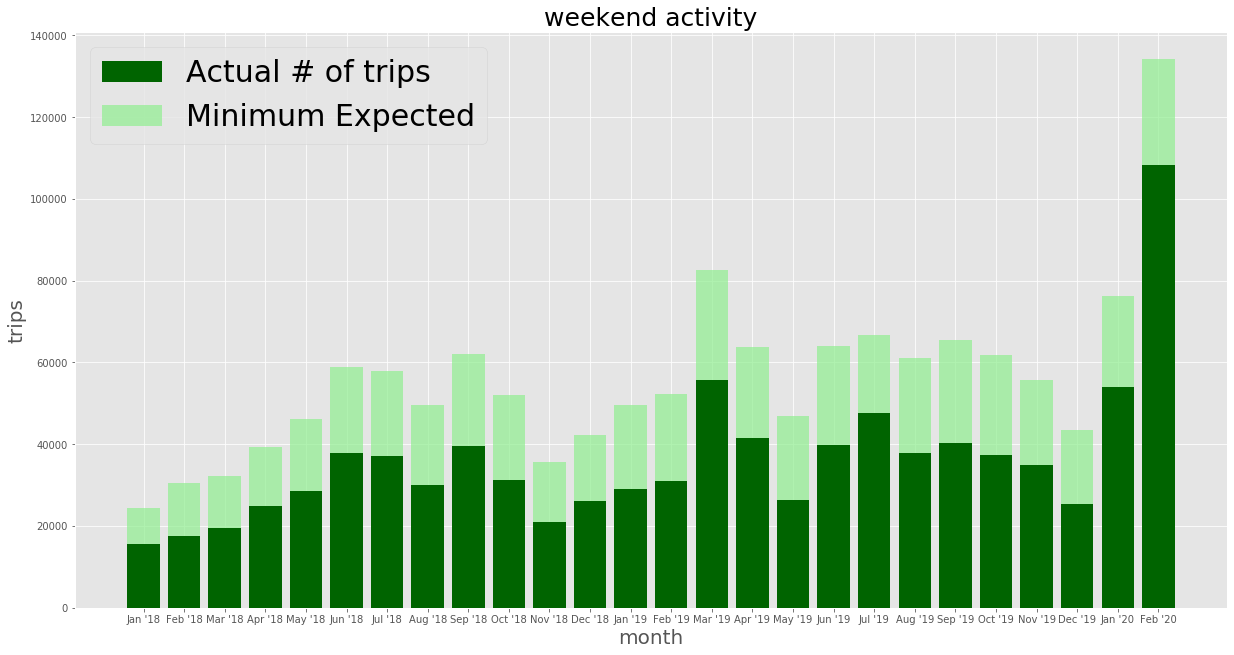

In [145]:
chart([weekend_data], kind='bar', name='weekend activity', y_name='trips', legend=('Actual # of trips', 'Minimum Expected'))

#### Surprised to see that without fail, weekend trips are taken a less than proportionately normal amount!


In [195]:
short_trips = bike_data.do_on_all(monthly_short_trips)
short_trips

OrderedDict([("Jan '18", 0.023480517288664796),
             ("Feb '18", 0.02488802263910493),
             ("Mar '18", 0.026656012641180803),
             ("Apr '18", 0.032599165961469556),
             ("May '18", 0.0332337752965806),
             ("Jun '18", 0.039098220117570213),
             ("Jul '18", 0.04124042525423899),
             ("Aug '18", 0.03256627220782465),
             ("Sep '18", 0.030872584135712637),
             ("Oct '18", 0.025404799015179343),
             ("Nov '18", 0.02268609982480337),
             ("Dec '18", 0.028006364044670114),
             ("Jan '19", 0.024218823210920337),
             ("Feb '19", 0.021552570169890737),
             ("Mar '19", 0.026952894861080223),
             ("Apr '19", 0.025226777521736767),
             ("May '19", 0.02277630473806426),
             ("Jun '19", 0.027277183321861378),
             ("Jul '19", 0.033978814577182666),
             ("Aug '19", 0.026918309484572314),
             ("Sep '19", 0.02727239363995853),


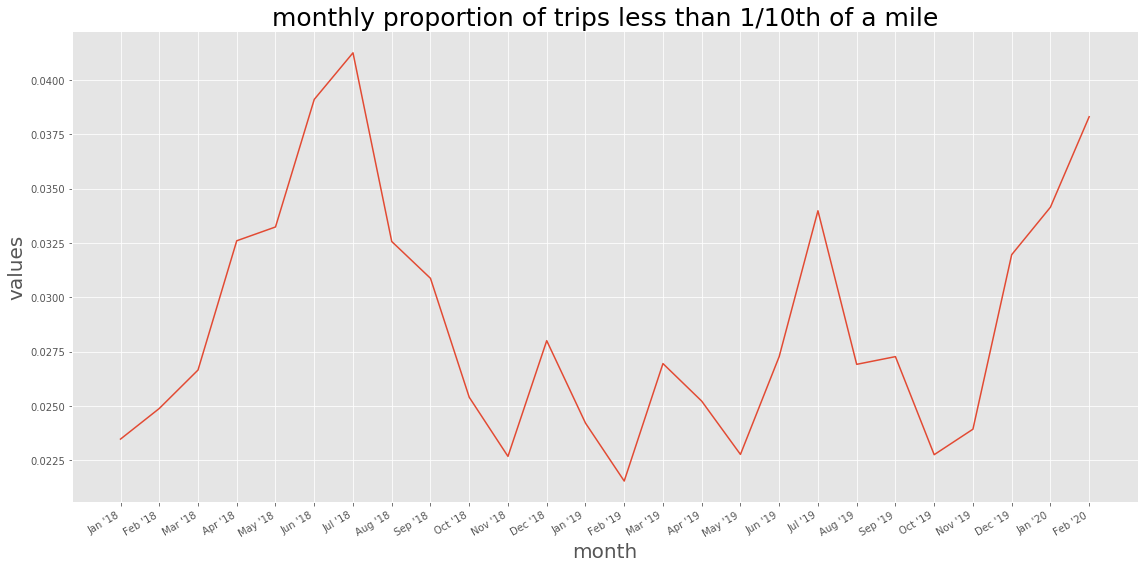

In [196]:
chart([short_trips], kind='plot', name='monthly proportion of trips less than 1/10th of a mile')

In [99]:
monthly_subs = bike_data.do_on_all(subscribers_per_month)

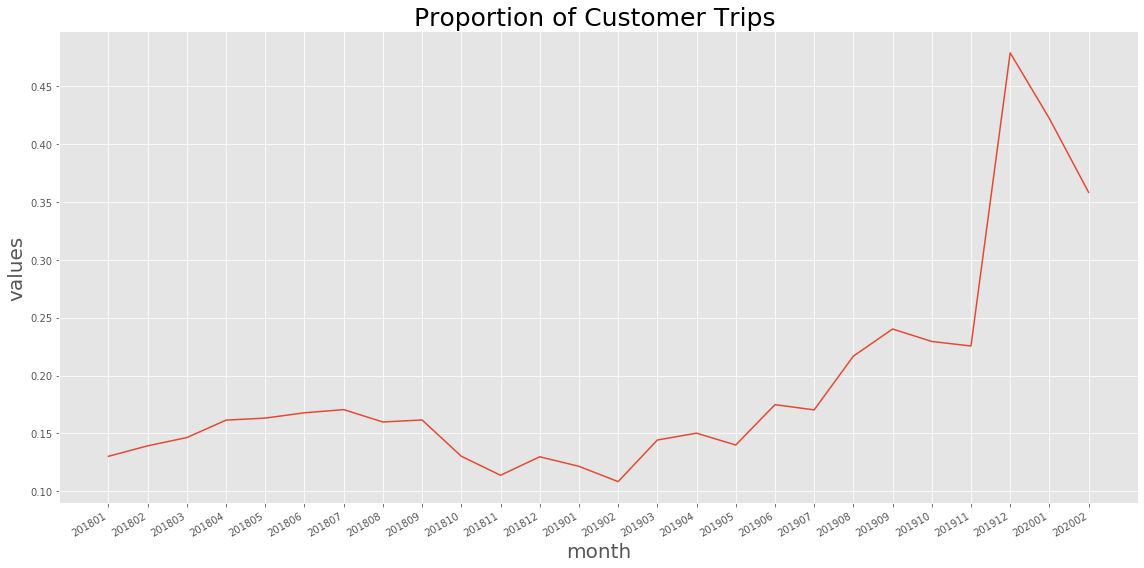

In [137]:
chart([monthly_subs], kind='plot', name="Proportion of Customer Trips ")

In [ ]:
### Looks like there's been a shift in advertising

In [159]:
daily_popularity = bike_data.sum_on_all(weekly_popularity) # + bike_data.do_on_all(weekly_popularity

<BarContainer object of 7 artists>

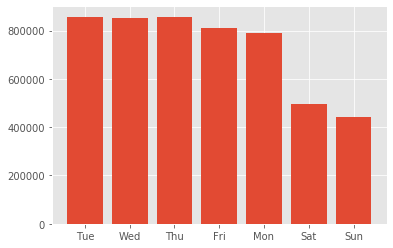

In [160]:
plt.bar(daily_popularity.index, daily_popularity.values) #clean this up later

In [168]:
weekday_distances = bike_data.do_on_all(weekday_v_weekend_distances)

In [173]:
weekday_distances

OrderedDict([("Jan '18", (1.0144456846842338, 0.9719616244282681)),
             ("Feb '18", (1.006112548858542, 0.9597663502818545)),
             ("Mar '18", (0.9912529862498561, 0.9292561546726189)),
             ("Apr '18", (0.9900588219990396, 0.921993617670033)),
             ("May '18", (0.9901706102130335, 0.9476865483187432)),
             ("Jun '18", (0.9856728808066013, 0.9487186209653821)),
             ("Jul '18", (0.9829847181326362, 0.9440835090104254)),
             ("Aug '18", (0.9942935988164837, 0.9665480125463229)),
             ("Sep '18", (0.9969249013266506, 0.9552528875957009)),
             ("Oct '18", (1.0116657773558522, 0.9608980686058439)),
             ("Nov '18", (0.992745134074566, 0.933356452827154)),
             ("Dec '18", (1.0171707837163257, 0.9574492344401703)),
             ("Jan '19", (1.0603810934279916, 1.0208919682385944)),
             ("Feb '19", (1.0607903779862822, 0.999541151339551)),
             ("Mar '19", (1.099399216553448, 1.062161

In [172]:
week_vs_end_times = bike_data.do_on_all(weekday_v_weekend_times)
week_vs_end_times

OrderedDict([("Jan '18", (785.1458462394276, 1303.0109519261382)),
             ("Feb '18", (791.47801790884, 1320.1195454545455)),
             ("Mar '18", (791.0419133008356, 1246.2681486805627)),
             ("Apr '18", (791.5852938410908, 1290.1853821668883)),
             ("May '18", (790.1051141273281, 1194.8320025105477)),
             ("Jun '18", (821.6686270417939, 1267.5226906303687)),
             ("Jul '18", (825.1293443077777, 1269.4537769735598)),
             ("Aug '18", (801.801368257415, 1244.5279127021092)),
             ("Sep '18", (789.0873474674484, 1217.9920560629444)),
             ("Oct '18", (745.0944984996976, 1133.6304438524985)),
             ("Nov '18", (712.9243892741971, 1001.2323150357995)),
             ("Dec '18", (725.2357321984953, 954.0152543022498)),
             ("Jan '19", (710.3670791335129, 978.4548299460091)),
             ("Feb '19", (688.5232024343537, 911.2366140713916)),
             ("Mar '19", (720.1033218055154, 1124.5166921348314)),
 

In [44]:
big_money_probability = bike_data.do_on_all(trip_activity)

In [45]:
big_money_probability

OrderedDict([("Jan '18", (0.22026895657809462, 12344)),
             ("Feb '18", (0.21216607226969922, 14861)),
             ("Mar '18", (0.21751395106396026, 16307)),
             ("Apr '18", (0.2082625118035883, 21180)),
             ("May '18", (0.18451383426245768, 29239)),
             ("Jun '18", (0.19101055256515526, 32883)),
             ("Jul '18", (0.21151299331940315, 33979)),
             ("Aug '18", (0.18747355057130766, 30719)),
             ("Sep '18", (0.1847938058684744, 30093)),
             ("Oct '18", (0.1720839843005754, 26243)),
             ("Nov '18", (0.16066282420749278, 15268)),
             ("Dec '18", (0.1751216937423025, 17051)),
             ("Jan '19", (0.1484796573875803, 23350)),
             ("Feb '19", (0.1308133682303201, 19868)),
             ("Mar '19", (0.17308524448290782, 36976)),
             ("Apr '19", (0.1531714651667873, 35914)),
             ("May '19", (0.15348709500274574, 25494)),
             ("Jun '19", (0.1647627285471411, 33527)),


### PROBABILITY OF A CASUAL BIKE RENT BEING A BIG TICKET CUSTOMER

In [43]:
data = list(big_money_probability.values())

In [35]:
valid_data = data[9:15] #June'18 was the last change to the geographic offerings, July'19 had serious recall issues until start of Dec'19
big_money_mean = np.mean(valid_data)
big_money_std = np.std(valid_data)

In [123]:
test_data = data[-3:]
test_data_mean = np.mean(test_data)
test_data_std = np.std(test_data)

In [39]:
from scipy import stats
normal = stats.norm(big_money_mean, big_money_std)

In [124]:
normal2 = stats.norm(test_data_mean, test_data_std)

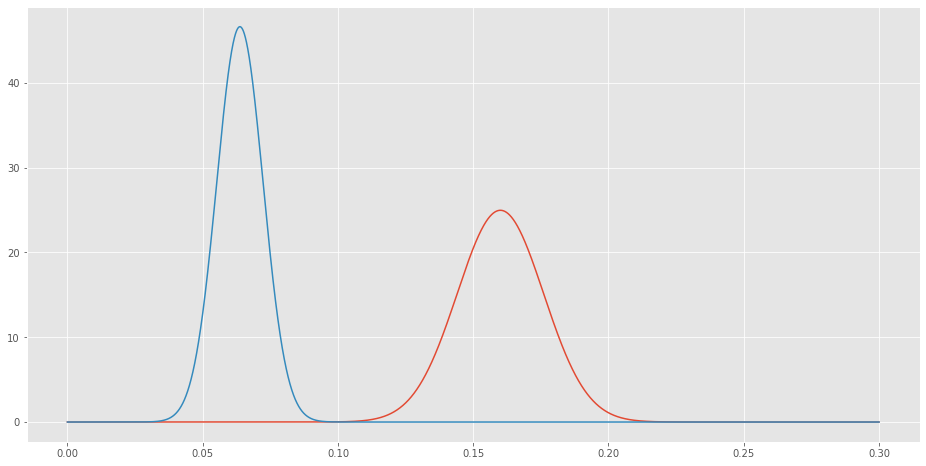

In [130]:
fig, ax = plt.subplots(figsize=(16,8))
x = np.linspace(0, .3, num = 10**4)
ax.plot(x, normal.pdf(x))
ax.plot(x, normal2.pdf(x))

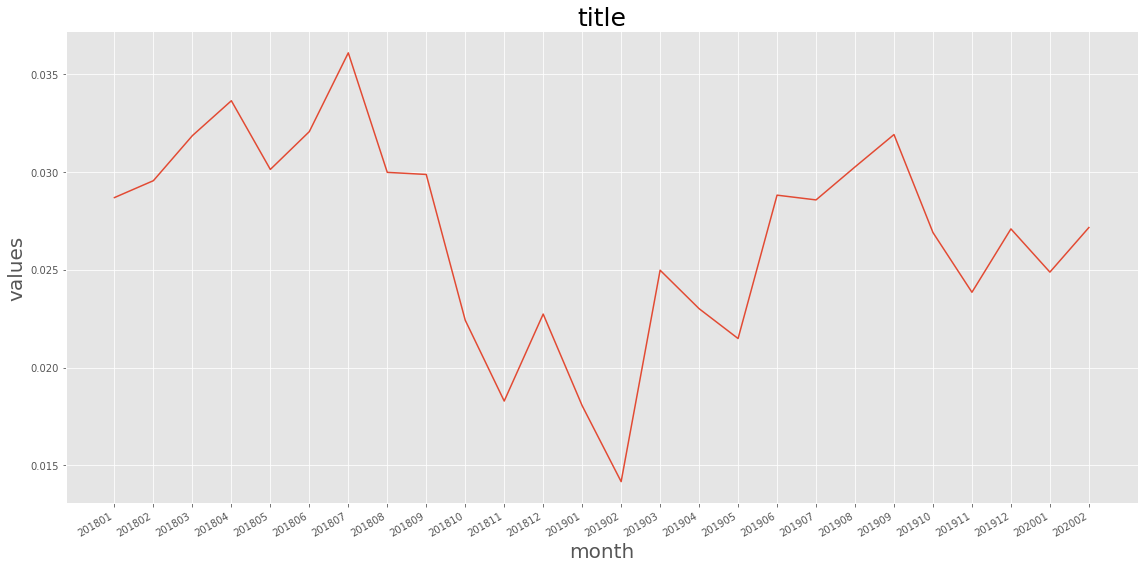

In [155]:
chart([big_money_probability], kind='plot')

In [ ]:
test_df = pd.read_csv('data/2017-fordgobike-tripdata.csv').head(3000)

In [97]:
customer_profit(test_df).profit.sum()

8141.0

In [116]:
customer_profits = bike_data.do_on_all(customer_profit)
customer_profits

OrderedDict([("Jan '18", 91876),
             ("Feb '18", 107866),
             ("Mar '18", 113248),
             ("Apr '18", 142545),
             ("May '18", 173834),
             ("Jun '18", 214410),
             ("Jul '18", 215468),
             ("Aug '18", 187414),
             ("Sep '18", 181341),
             ("Oct '18", 148090),
             ("Nov '18", 83036),
             ("Dec '18", 87058),
             ("Jan '19", 117860),
             ("Feb '19", 104113),
             ("Mar '19", 203114),
             ("Apr '19", 178385),
             ("May '19", 122943),
             ("Jun '19", 157018),
             ("Jul '19", 203862),
             ("Aug '19", 189688),
             ("Sep '19", 208698),
             ("Oct '19", 218190),
             ("Nov '19", 159532),
             ("Dec '19", 203579),
             ("Jan '20", 340815),
             ("Feb '20", 454218)])

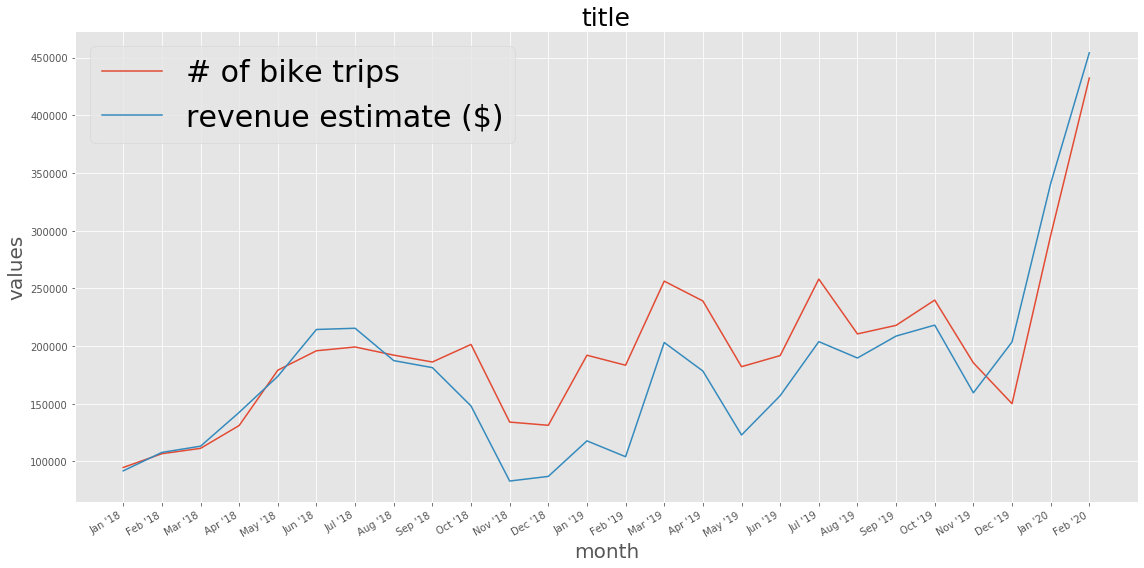

In [259]:
chart([bike_trips_per_month, customer_profits], kind='plot', legend=('# of bike trips', 'revenue estimate ($)'))

In [101]:
monthly_customers = bike_data.do_on_all(subscribers_per_month)
monthly_customers

In [104]:
customers = list(monthly_customers.values())
profits = list(customer_profits.values())

In [105]:
stats.ttest_ind(customers, profits)

Ttest_indResult(statistic=-6.980038129817947, pvalue=6.448373617030341e-09)

In [260]:
pickle_in = open('data/202001.pickle', 'rb')
test_df = pickle.load(pickle_in)
print (test_df.head())
pickle_in.close()

In [261]:
test_df.head()

,date,day_of_week,weekend,bike_id,user_type,revenue,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,distance
0,31,Fri,False,13052,Customer,275,83118,37.804272,-122.433537,37.804272,-122.433537,0.000000
1,31,Fri,False,12235,Subscriber,219,68239,37.767037,-122.415443,37.767037,-122.415443,0.000000
2,31,Fri,False,12822,Customer,182,55407,37.808848,-122.249680,37.808848,-122.249680,0.000000
3,31,Fri,False,11705,Customer,182,54929,37.808848,-122.249680,37.808848,-122.249680,0.000000
4,31,Fri,False,3673,Customer,182,55700,37.796389,-122.394586,37.802746,-122.413579,1.128071


In [257]:
test_df.groupby('revenue').user_type.count()

revenue
0      81891
2       9625
3        231
5        974
6        100
       ...  
269        1
273        1
276        1
281        2
284        1
Name: user_type, Length: 137, dtype: int64

In [197]:
heat_df = test_df[test_df["start_station_longitude"] != 0]